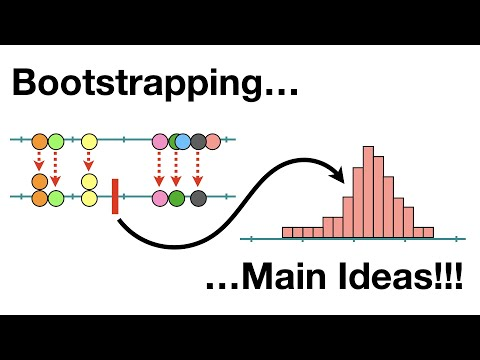

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1. Standard deviation describes the variability of data points around the mean of the dataset, or show how far the data spread from the mean within a sample. Meanwhile, standard error of mean describes the spread of the mean estimate obtained from that sample.

2. First, we need to determine the Standard Error of Mean (SEM). 
Second, we need to obtain the z-score for the 95% confidence interval, which is 1.96. 
Third, we need to calculate the margin of error by multiplying the z-score with the SEM: 1.96 x SEM
Forth, after knowing the margin of error, we can calculate the lower bound of the 95% confidence interval by subtracting the mean with the margin of error, and we can calculate the upper bound of the interval by adding the mean with the margin of error. 

3. First, we need to do bootstrapping, which is resampling the data with replacement to create many bootstrap samples. For each sample, we calculate the mean. Then, we order all of the mean ascendingly. Next, we calculate the 2.5th and 97.5th percentile, which act as the lower and upper bound of the 95% confidence interval, respectively.

4.

In [5]:
import numpy as np

data = np.array([3,6,4,1,8,9,5,2])

n_bootstraps = 1000
boot_means = []

for i in range(n_bootstraps):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    # This np.mean can be changed if we want to use different population parameter, such as population median
    boot_means.append(np.mean(bootstrap_sample))
    
boot_means = np.sort(boot_means)

lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

print(lower_bound, upper_bound)

2.75 6.628124999999997


5. We need to distinguish between the role of population parameter and sample statistic because we usually don't know where the population parameter lie, which we will be using to calculate the confidence interval, so we utilize the sample statistic in order to estimate the range in which the population parameter might lie. Failing to do so might lead to a misunderstanding of what the confidence interval is estimating.

6. A. Bootstrapping is a method that resamples a dataset many times. Suppose we have a dataset with 6 values. First, we randomly choose 6 values from that dataset, which can be a duplicate from the previous values that have already been taken, then we call it sample. From this sample, we calculate the sample statistics (mean, median, etc) then we keep the record of that calculation in a new histogram. These steps are repeated many times and all of the calculations are kept in the same histogram. From this histogram, we can meeasure the accuracy of our population (confidence intervals, bias, etc).

B. To allow people to generate a more accurate sample from a smaller data set, since most of the time, it is impractical to collect data from the entire population. 

C. First, I will create a bootstraped sample by randomly choosing n numbers from the population with replacement. Then, I will calculate the mean of that sample and keep the result of the calculation in a new histogram. These process are then repeated many times and all of the mean calculated are stored in the same histogram. From this new histogram, I can calculate the 95% confidence interval that will be used to compare my hypothesized guess and determine whether or not my guess is plausible.

7. Since the confidence interval gives a plausible value for the true population parameter, a confidence interval that include zero means that there is not enough evidence to conclude that the true population mean is differ from zero. Alternatively, a confidence interval that doesn't include zero will produce the opposite result, which is "to reject the null hypothesis."

Summary: https://chatgpt.com/share/66feb006-09b0-8012-9c09-bad11b802e4f
    
Standard Error of the Mean vs. Standard Deviation:

Standard Deviation (SD) measures the spread of individual data points around the mean in a dataset.
Standard Error of the Mean (SEM) measures the precision of the sample mean as an estimate of the population mean and decreases as sample size increases.

Calculating a 95% Confidence Interval (CI):

To calculate a 95% CI using SEM, use the formula. The z-score for a 95% CI is typically 1.96.

Bootstrapped Confidence Intervals:

To create a 95% bootstrapped CI using bootstrapped means, use the percentile method:
Resample the data with replacement.
Calculate the mean for each bootstrap sample.
Sort the bootstrapped means and find the 2.5th and 97.5th percentiles for the CI.
Calculating CI for Population Median:

To estimate the 95% CI for the population median, change the line that calculates the mean of the bootstrap samples to calculate the median instead:
boot_means.append(np.median(bootstrap_sample))

Importance of Distinguishing Population Parameter and Sample Statistic:

The population parameter (like the true mean) is fixed and usually unknown, while the sample statistic (like the sample mean) is computed from the data.
Confidence intervals provide a range for the population parameter based on the sample statistic, and overlapping zero in a CI implies failing to reject the null hypothesis.

Confidence Interval Overlapping Zero:

A CI that overlaps zero indicates that zero is a plausible value for the population parameter, leading to a failure to reject the null hypothesis, even if the sample mean itself is not zero.

8. 

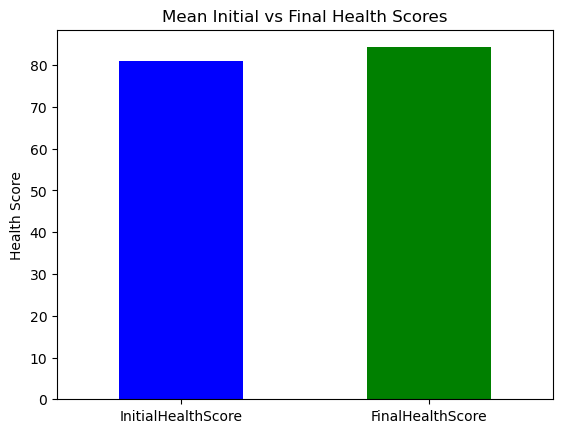

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("vaccine_data.csv")

mean_scores = df[['InitialHealthScore', 'FinalHealthScore']].mean()

mean_scores.plot(kind='bar', color=['blue', 'green'])
plt.title('Mean Initial vs Final Health Scores')
plt.ylabel('Health Score')
plt.xticks(rotation=0)
plt.show()

Problem Introduction

Our Null Hypothesis will be there is no effect of the usage of the vaccine, meaning that there is no significant impact after our patients received the vaccine. Meanwhile, our Alternative Hypothesis will be there is a significant effect after the use of vaccine.

The above graph shows the mean value of the Initial Health Score compared to the Final Health Score. However, we can't see clearly the effect as the data that we have only has small size. Thus, we need to do bootstrapping to get a better insight whether or not the impact of the vaccine is significant.

Quantitative Analysis

In [9]:
import plotly.express as px

observed_mean_diff = df['FinalHealthScore'].mean() - df['InitialHealthScore'].mean()

np.random.seed(42)

n_bootstraps = 1000
bootstrap_means = []

for i in range (n_bootstraps):
    initial_sample = np.random.choice(df['InitialHealthScore'], size=len(df), replace=True)
    final_sample = np.random.choice(df['FinalHealthScore'], size=len(df), replace=True)
    
    mean_diff = np.mean(final_sample) - np.mean(initial_sample)
    bootstrap_means.append(mean_diff)
    
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"Observed Mean Difference: {observed_mean_diff:.2f}")
print(f"Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

Observed Mean Difference: 3.30
Confidence Interval: [1.30, 5.40]


Above, we code to do the bootstrapping. We set the np.random.seed to 42 and set the number of bootstrapping to do 1000 resamplings. After the iteration completed, we calculated the lower_bound and upper_bound to show the 2.5th percentile and 97.5 percentile, which is the 95% confidence interval. Therefore, we obtained the lower bound is 1.30 and the upper bound is 5.40.

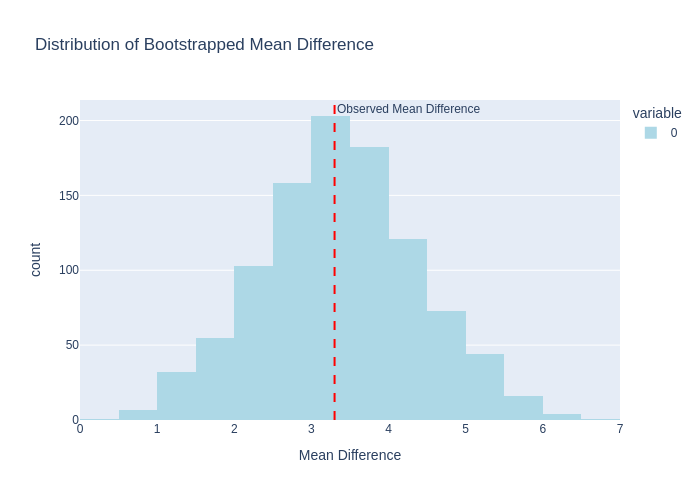

In [10]:
fig = px.histogram(bootstrap_means, nbins=30, title='Distribution of Bootstrapped Mean Difference',
                  labels={'value': 'Mean Difference'}, color_discrete_sequence=['lightblue'])
fig.add_vline(x=observed_mean_diff, line_dash="dash", line_color="red", annotation_text="Observed Mean Difference")

fig.show(renderer='png')

This is the visualization of the bootstrapped mean differences obtained from the code above. The observed mean differences, which is 3.30, is highlighted with the red lines.

Findings and Discussion

Since we obtained the 95% confidence interval lies in the interval [1.30, 5.40], we can confidently reject the null hypothesis and accept the alternate hypothesis. It is because the confidence interval does not include zero, meaning that there are enough evidences to reject the null hypothesis. In conclusion, there is a significant impact after the use of vaccine or, in other words, the vaccine is effective.

9. Yes